## Import libraries

In [2]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import tensorflow as tf
from IPython.display import clear_output, display
from tensorflow.keras import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import normalize

## Load data

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f"Image dimensions: {X_train[0].shape}")
print(f"No. of training samples: {len(X_train)}")
print(f"No. of testing samples: {len(X_test)}")

Image dimensions: (28, 28)
No. of training samples: 60000
No. of testing samples: 10000


## Plot the first image

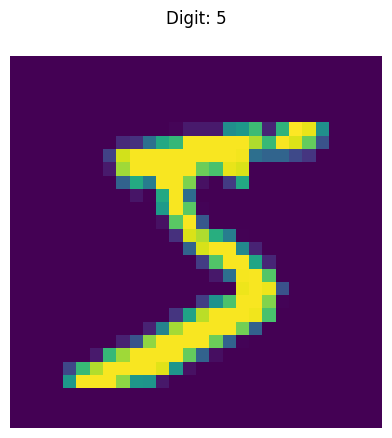

In [17]:
plt.matshow(X_train[0])
plt.title(f"Digit: {y_train[0]}")
plt.axis('off')
plt.show()

## Normalize data

In [5]:
X_train_scaled = normalize(X_train, axis=1)
X_test_scaled = normalize(X_test, axis=1)

## Train neural network classification model

In [6]:
model = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.8713 - loss: 0.4670
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9675 - loss: 0.1098
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9784 - loss: 0.0690
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9849 - loss: 0.0481
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9884 - loss: 0.0373


## Evaluate on test data

In [7]:
model.evaluate(X_test_scaled, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9667 - loss: 0.1147


[0.10221392661333084, 0.9696999788284302]

## Save and load model

In [10]:
model.save("model.keras")
model = load_model("model.keras")

## Predict on test data

In [16]:
y_prob = model.predict(X_test_scaled)
y_pred = [np.argmax(y) for y in y_prob]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


## Predict the digit from the first image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Class probabilities: [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


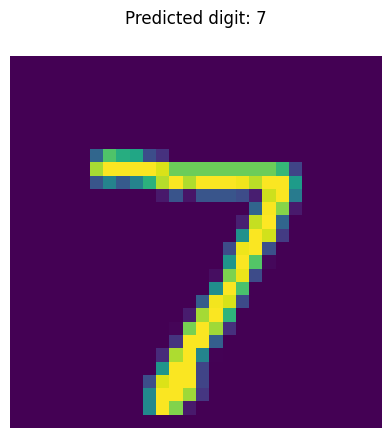

In [15]:
sample = X_test_scaled[0].reshape(1, 28, 28)
plt.matshow(X_test[0])
class_probabilities = model.predict(sample)
print(f"Class probabilities: {class_probabilities.round(2)}")
class_prediction = np.argmax(class_probabilities)
plt.title(f"Predicted digit: {class_prediction}")
plt.axis('off')
plt.show()

## Confusion matrix

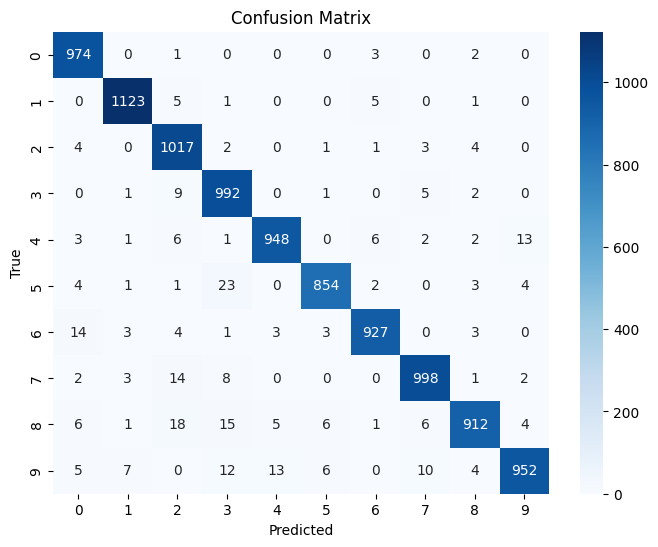

In [13]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()